PQ2 Are there areas where Enlisted Accessions differs from the population?

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

READ IN FILE

In [2]:
df = pd.read_excel('../data/FY2010_20_Active_Component_Accessions_Non_PriorSvc_Census_Region_v1.xlsx')

In [3]:
df

,division,Year,DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total_Percentage
0,NORTHEAST REGION,2010,16768,12.900000,3139,12.100000,19907,12.700000,57074.685716,18.20,18.30,18.20
1,New England Division,2010,4544,3.500000,705,2.700000,5249,3.400000,58038.261498,4.70,4.70,4.70
2,Middle Atlantic Division,2010,12224,9.400000,2434,9.400000,14658,9.400000,56733.873756,13.50,13.60,13.60
3,MIDWEST REGION,2010,27041,20.800000,4601,17.700000,31642,20.200000,45776.871746,22.40,22.30,22.30
4,East North Central Division,2010,18686,14.300000,3221,12.400000,21907,14.000000,45133.884500,15.60,15.60,15.60
...,...,...,...,...,...,...,...,...,...,...,...,...
146,West South Central Division,2020,18056,15.240000,4319,15.372842,22375,15.267202,60305.367844,12.83,13.33,10.08
147,WEST REGION,2020,28978,24.462059,6772,24.103933,35750,24.393406,69650.761866,24.87,23.69,24.28
148,Mountain Division,2020,9680,8.171466,2332,8.300409,12012,8.196184,57141.732470,8.42,7.43,7.93
149,Pacific Division,2020,19298,16.290594,4440,15.803524,23738,16.197222,75477.887476,16.45,16.26,16.35


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   division                    151 non-null    object 
 1   Year                        151 non-null    int64  
 2   DoD_Male                    151 non-null    int64  
 3   DoD_Male_Percentage         151 non-null    float64
 4   DoD_Female                  151 non-null    int64  
 5   DoD_Female_Percentage       151 non-null    float64
 6   DoD_Total                   151 non-null    int64  
 7   DoD_Total_Percentage        151 non-null    float64
 8   GDP_Per_Capita              151 non-null    float64
 9   Civilian_Male_Percentage    150 non-null    float64
 10  Civilian_Female_Percentage  150 non-null    float64
 11  Civilian_Total_Percentage   150 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 14.3+ KB


In [5]:
##I want all the rows where the column 'division' has 'REGION' in it
#https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
#Disney checkpoint Q15

In [6]:
df_region = df[df['division'].str.contains('REGION')]
df_region.head(2)

,division,Year,DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total_Percentage
0,NORTHEAST REGION,2010,16768,12.9,3139,12.1,19907,12.7,57074.685716,18.2,18.3,18.2
3,MIDWEST REGION,2010,27041,20.8,4601,17.7,31642,20.2,45776.871746,22.4,22.3,22.3


In [7]:
#Filter 'df_region' by year

In [8]:
#movies_df = disney.loc[disney['type'] == 'Movie']
df_region.loc[df_region['Year'] == 2010]

,division,Year,DoD_Male,DoD_Male_Percentage,DoD_Female,DoD_Female_Percentage,DoD_Total,DoD_Total_Percentage,GDP_Per_Capita,Civilian_Male_Percentage,Civilian_Female_Percentage,Civilian_Total_Percentage
0,NORTHEAST REGION,2010,16768,12.9,3139,12.1,19907,12.7,57074.685716,18.2,18.3,18.2
3,MIDWEST REGION,2010,27041,20.8,4601,17.7,31642,20.2,45776.871746,22.4,22.3,22.3
6,SOUTH REGION,2010,55501,42.6,12309,47.3,67810,43.4,44793.094239,35.7,35.9,35.8
10,WEST REGION,2010,30964,23.8,5966,22.9,36930,23.6,49554.226444,23.8,23.5,23.7


In [10]:
df_region_10 = df_region.loc[df_region['Year'] == 2010]

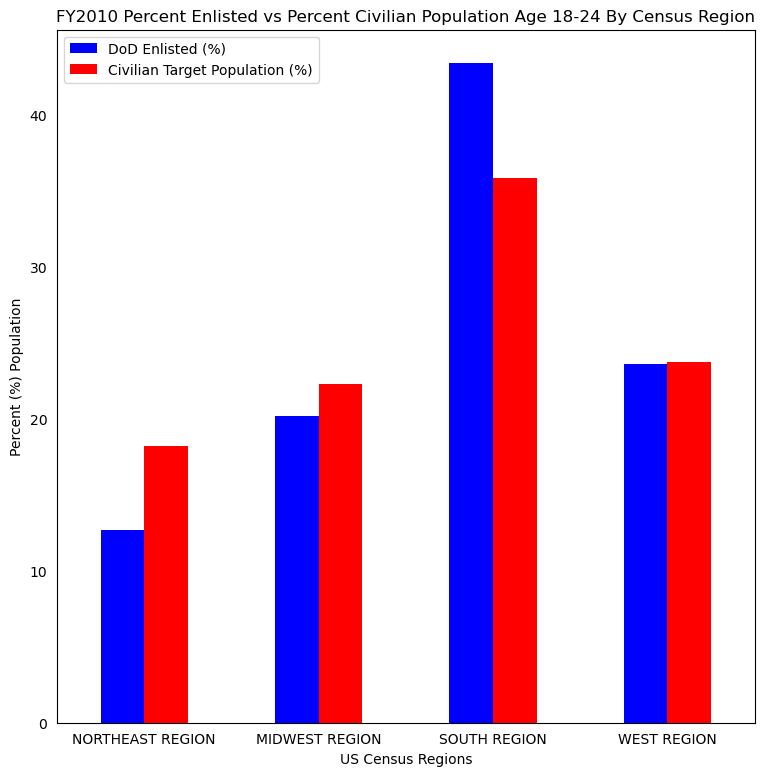

In [17]:
#https://www.geeksforgeeks.org/how-to-plot-multiple-data-columns-in-a-dataframe/
#https://www.geeksforgeeks.org/how-to-change-the-color-of-a-single-bar-in-a-bar-plot/
colors = ['blue', 'red']
df_region_10 = pd.DataFrame(df_region_10, columns=['division', 'DoD_Total_Percentage', 'Civilian_Total_Percentage'])

df_region_10.plot(x='division', y=['DoD_Total_Percentage', 'Civilian_Total_Percentage'], kind = 'bar', color = colors, figsize = (9,9))
#plt.bar(color=colors)
plt.xticks(rotation = 0)
plt.tick_params(left = False, bottom = False)

# Change the legend
labels_legend = ['DoD Enlisted (%)', 'Civilian Target Population (%)']
# Displaying the legend
plt.legend(labels = labels_legend)

plt.xlabel('US Census Regions')
plt.ylabel('Percent (%) Population')
plt.title('FY2010 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show()      

In [15]:
df_region_20 = df_region.loc[df_region['Year'] == 2020]

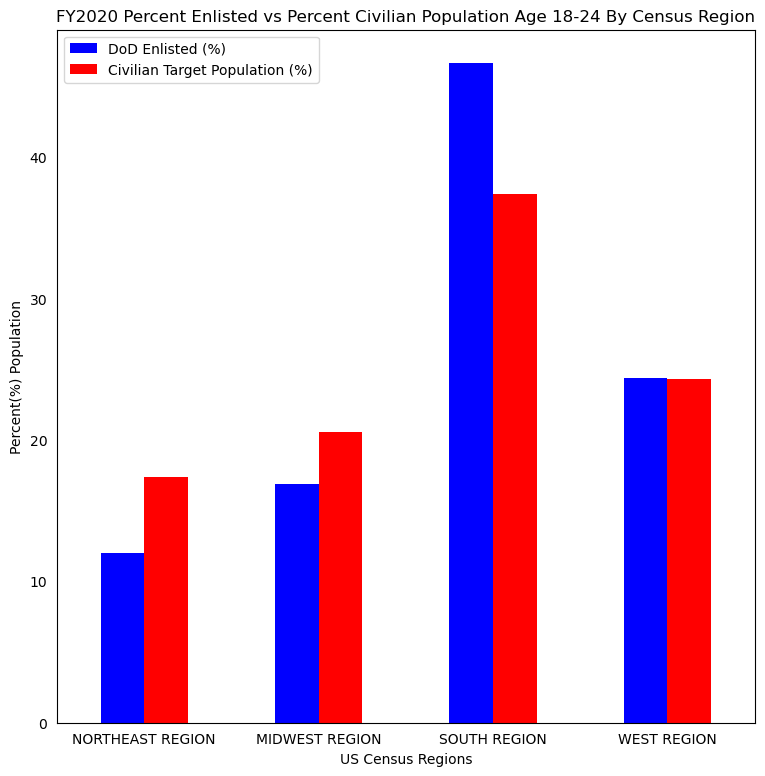

In [16]:
colors = ['blue', 'red']
df_region_20 = pd.DataFrame(df_region_20, columns=['division', 'DoD_Total_Percentage', 'Civilian_Total_Percentage'])

df_region_20.plot(x='division', y=['DoD_Total_Percentage', 'Civilian_Total_Percentage'], kind = 'bar', color = colors, figsize = (9,9))
plt.tick_params(left = False, bottom = False)

# Change the legend
labels_legend = ['DoD Enlisted (%)', 'Civilian Target Population (%)']
# Displaying the legend
plt.legend(labels = labels_legend)

plt.xticks(rotation = 0)
plt.xlabel('US Census Regions')
plt.ylabel('Percent(%) Population')
plt.title('FY2020 Percent Enlisted vs Percent Civilian Population Age 18-24 By Census Region')
plt.show()